In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform

# Comment here to add in for either mac or linux computer
if platform.system() == "Linux":   # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == "Darwin":
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == "Windows":
    print('No windows repositories defined')

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.utils.signal_process import WaveletSg
from neuropy.plotting.spikes import plot_raster, plot_binned_raster
from neuropy.plotting.signals import plot_signal_w_epochs, plot_spectrogram

from tracefc.io.session_directory import get_session_dir

In [2]:
# Define a class for a typical recording or set of recordings
from neuropy.core.session import ProcessData
    
def sess_use(basepath=os.getcwd()):

    return ProcessData(basepath)

## Theta

In [3]:
# Loop through and load in artifacts, signal, and do theta wavelet
training_sessions = [['Rose','Habituation1'], ['Rose','Habituation2']]
theta_channels = [24, 24]
theta_range = np.arange(4, 14, 0.25)
rec_list = []

for (animal, sess_name), theta_channel in zip(training_sessions, theta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_theta = WaveletSg(signal.time_slice(channel_id=theta_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=theta_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

In [4]:
rec_list

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

In [5]:
# Import USVs
usv_list = []
for sess in rec_list:
    # Import USV epochs (from Sync_USV_and_Ephys notebook).
    usv_epochs_file = sess.filePrefix.with_suffix(".usv_epochs.npy")
    usv_epochs = Epoch(epochs=None, file=usv_epochs_file)
    usv_list.append(usv_epochs)

In [6]:
theta_range

array([ 4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,
        6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,
        8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 ,
       10.75, 11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75,
       13.  , 13.25, 13.5 , 13.75])

In [7]:
# Plot low USVs for all animals
#freq_thresh = 30
#theta_freq_lims = [4,14]
#usv_buffer_sec = (5,5)

#for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
 #   low_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min < freq_thresh]
    
  #  wv_theta_mean = sess.wv_theta.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
   # ax = plot_spectrogram(wv_theta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[4, 14])
    #ax.set_xlabel('Time from USV start (sec)')
    #ax.set_title(f"{animal}: Low Freq. USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

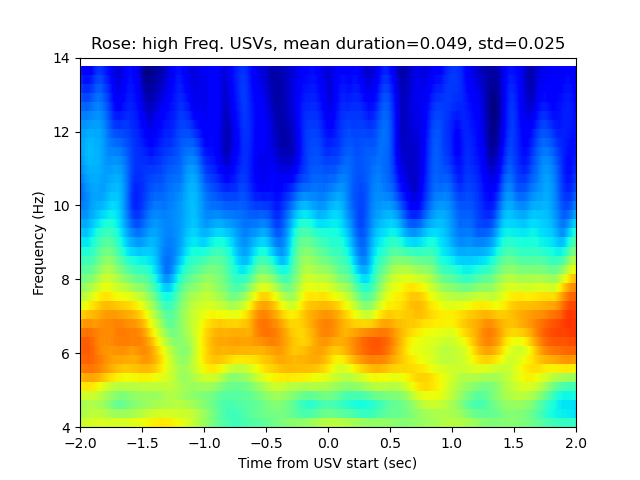

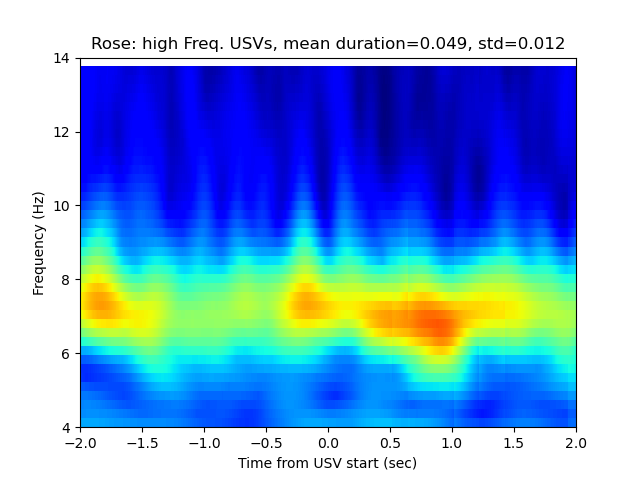

In [16]:
# Plot high USVs for all animals
freq_thresh = 20
theta_freq_lims = [4, 14]
usv_buffer_sec = (2, 2)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    high_usvs = usv_epochs._epochs[usv_epochs._epochs.Freq_Min > freq_thresh]
    
    wv_theta_mean = sess.wv_theta.get_pe_mean_spec(high_usvs['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_theta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[4, 14])
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: high Freq. USVs, mean duration={high_usvs.Duration.mean():.3f}, std={high_usvs.Duration.std():.3f}")

In [9]:
wv_theta_mean.traces.shape

(40, 5000)

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

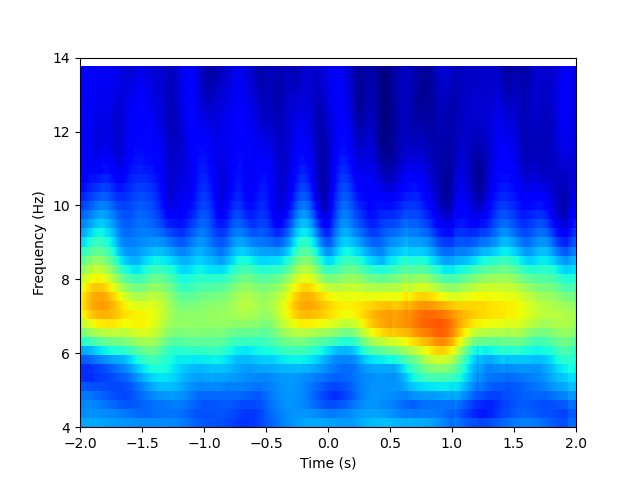

In [10]:
%matplotlib widget
plot_spectrogram(wv_theta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=theta_freq_lims)

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

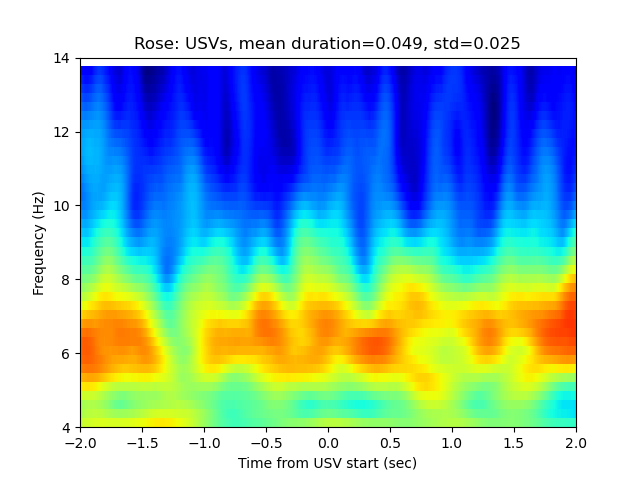

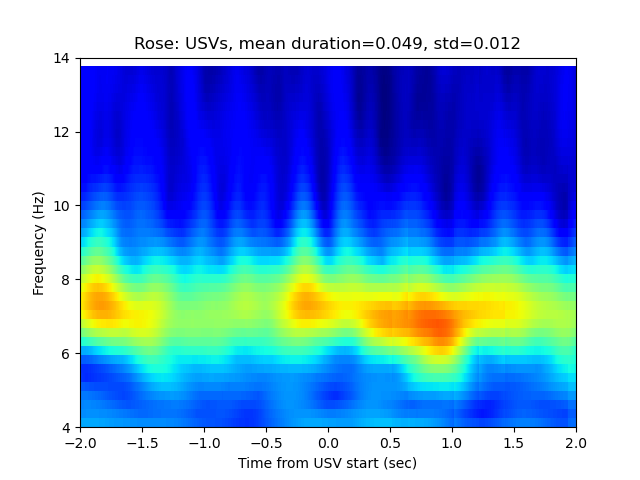

In [17]:
# Plot all USVs for all animals
freq_thresh = None
theta_freq_lims = [4, 14]
usv_buffer_sec = (2,2)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    all_usvs = usv_epochs._epochs
    wv_theta_mean = sess.wv_theta.get_pe_mean_spec(usv_epochs.to_dataframe()['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_theta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=theta_freq_lims)
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: USVs, mean duration={all_usvs.Duration.mean():.3f}, std={all_usvs.Duration.std():.3f}")

## Ripple

In [33]:
training_sessions = [['Rose', 'Habituation1'],['Rose','Habituation2']]
ripple_channels = [25, 25]
ripple_range = np.arange(125, 275, 5)
rec_list = []

for (animal, sess_name), ripple_channel in zip(training_sessions, ripple_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_ripple = WaveletSg(signal.time_slice(channel_id=ripple_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=ripple_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

In [19]:
ripple_range

array([125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185,
       190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250,
       255, 260, 265, 270])

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(1…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(1…

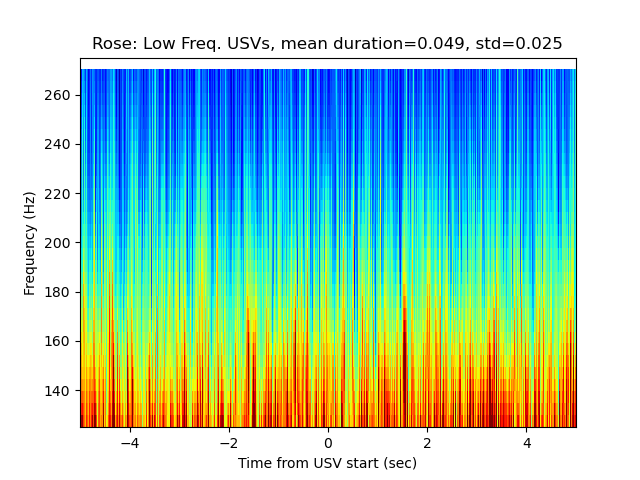

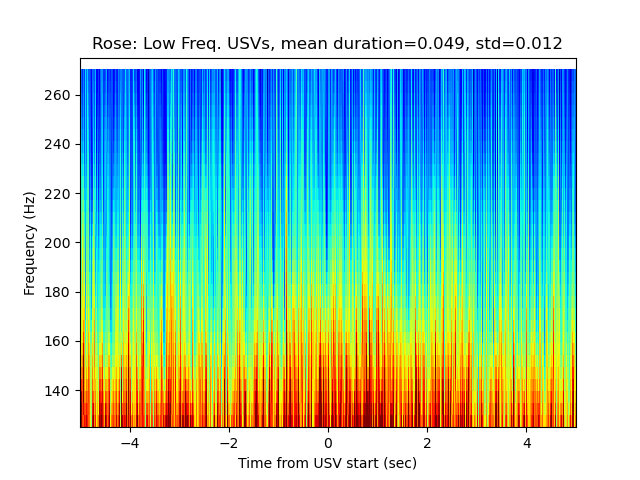

In [35]:
# Plot all USV(all high) for all animals
swr_freq_lims = [125,275]
usv_buffer_sec = (5,5)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    all_usvs = usv_epochs._epochs
    
    wv_swr_mean = sess.wv_ripple.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_swr_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=swr_freq_lims)
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: Low Freq. USVs, mean duration={all_usvs.Duration.mean():.3f}, std={all_usvs.Duration.std():.3f}")

In [24]:
wv_swr_mean.traces.shape

(30, 12500)

## Delta

In [25]:
training_sessions = [['Rose', 'Habituation1'],['Rose','Habituation2']]
delta_channels = [25, 25]
delta_range = np.arange(0.5,4.25, 0.1)
rec_list = []


for (animal, sess_name), delta_channel in zip(training_sessions, delta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_delta = WaveletSg(signal.time_slice(channel_id=delta_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=delta_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(0…

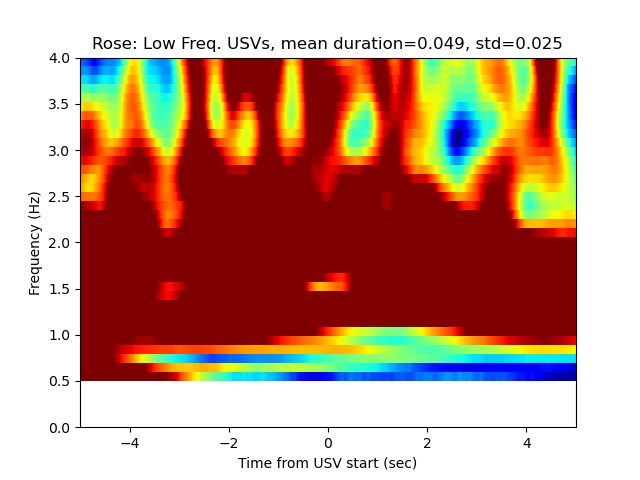

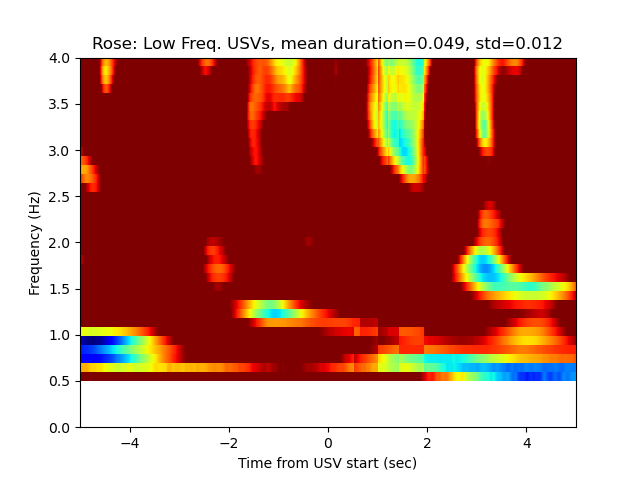

In [28]:
# Plot low USVs for all animals
delta_freq_lims = [0.5, 4.5]
usv_buffer_sec = (5,5)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    low_usvs = usv_epochs._epochs
    
    wv_delta_mean = sess.wv_delta.get_pe_mean_spec(low_usvs['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_delta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=[0.5, 4.5])
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: Low Freq. USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")

## Beta

In [37]:
# Loop through and load in artifacts, signal, and do beta wavelet
training_sessions = [['Rose', 'Habituation1'],['Rose','Habituation2']]
beta_channels = [25, 25]
beta_range = np.arange(12, 40, 1)
rec_list = []

for (animal, sess_name), beta_channel in zip(training_sessions, beta_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_beta = WaveletSg(signal.time_slice(channel_id=beta_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=beta_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(1…

/data/GitHub/NeuroPy/neuropy/plotting/signals.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1, 1)


interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(1…

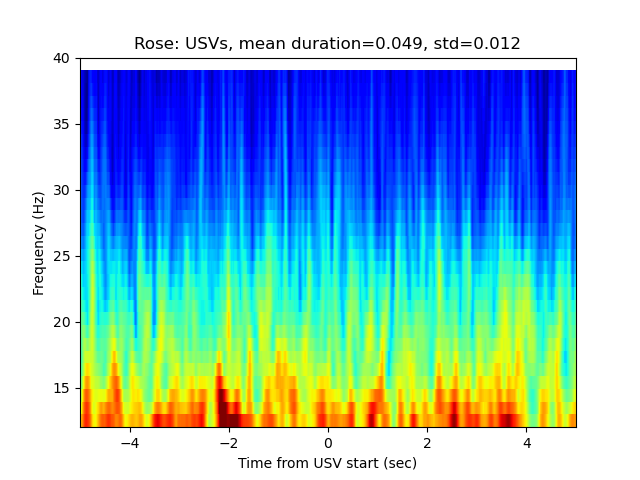

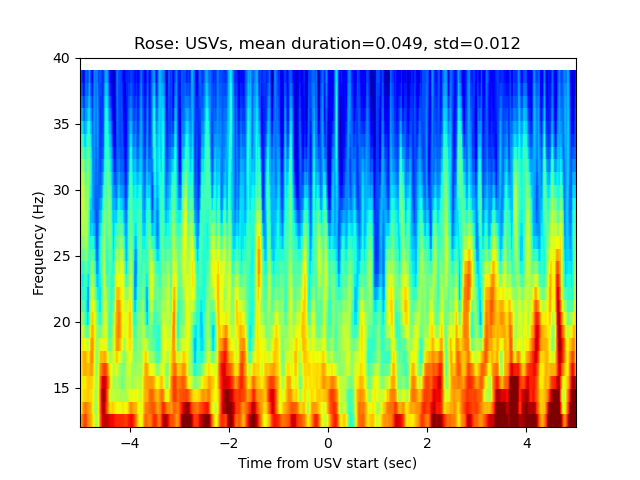

In [38]:
# Plot all USVs for all animals
beta_freq_lims = [12, 40]
usv_buffer_sec = (5,5)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    
    wv_beta_mean = sess.wv_beta.get_pe_mean_spec(usv_epochs.to_dataframe()['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_beta_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=beta_freq_lims)
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")

## Gamma

In [39]:
training_sessions = [['Rose', 'Habituation1'],['Rose','Habituation2']]
gamma_channels = [25, 25]
gamma_range = np.arange(40, 80, 1)
rec_list = []

for (animal, sess_name), gamma_channel in zip(training_sessions, gamma_channels):
    
    sess_dir = get_session_dir(animal, sess_name)
    sess = sess_use(sess_dir)
    art_epochs_file = sess.filePrefix.with_suffix(".art_epochs.npy")
    sess.signal = sess.eegfile.get_signal()
    sess.art_epochs = Epoch(epochs=None, file=art_epochs_file)
    signal = sess.eegfile.get_signal()
    sess.wv_gamma = WaveletSg(signal.time_slice(channel_id=gamma_channel, t_stop=np.min((80*60, signal.t_stop))), 
                              freqs=gamma_range, sigma=None)
    
    rec_list.append(sess)
rec_list
# print(sess.recinfo)

[ProcessData(Rose_habituation1_denoised.xml),
 ProcessData(Rose_habituation2_denoised.xml)]

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

interactive(children=(FloatSlider(value=6.0, description='Clim :', max=30.0, min=0.1), IntRangeSlider(value=(4…

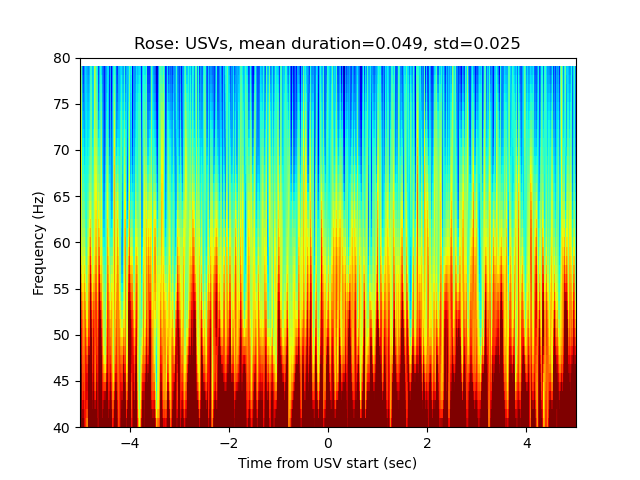

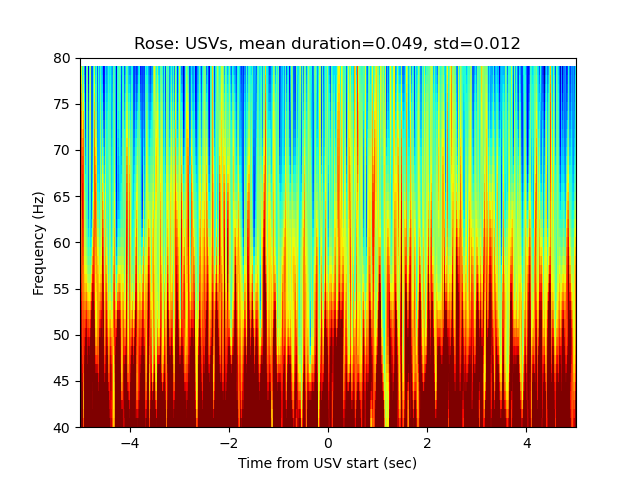

In [42]:
# Plot all USVs for all animals
gamma_freq_lims = [40, 80]
usv_buffer_sec = (5,5)

for (animal, sess_name), sess, usv_epochs in zip(training_sessions, rec_list, usv_list):
    low_usvs = usv_epochs._epochs
    wv_gamma_mean = sess.wv_gamma.get_pe_mean_spec(usv_epochs.to_dataframe()['start'].values, buffer_sec=usv_buffer_sec, ignore_epochs=sess.art_epochs)
    ax = plot_spectrogram(wv_gamma_mean, time_lims=np.multiply(usv_buffer_sec, (-1, 1)), freq_lims=gamma_freq_lims)
    ax.set_xlabel('Time from USV start (sec)')
    ax.set_title(f"{animal}: USVs, mean duration={low_usvs.Duration.mean():.3f}, std={low_usvs.Duration.std():.3f}")